In [329]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [280]:
df = pd.read_csv("updated_signal.csv")


In [281]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,input_data,output_data,received_data_real,received_data_imag,transmitted_data_real,transmitted_data_imag,encoded_data_real,encoded_data_imag
0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,23,23,165,162,-1.099938,0.032600,1.005887,0.008205,1.414214,-1.414214
2,29,29,168,162,-0.111939,-0.345232,-0.084933,0.102517,1.414214,1.414214
3,30,30,41,36,0.048014,0.193218,-0.649755,0.174344,1.414214,1.414214
4,35,35,30,36,0.700004,1.254664,0.082843,0.312132,1.414214,1.414214
5,60,60,238,246,0.167347,-0.958249,-1.010805,0.811226,1.414214,-1.414214
6,75,75,95,91,1.483420,-0.663337,-0.913666,0.238490,-1.414214,1.414214
7,113,113,87,88,-0.207286,0.896369,-0.075678,0.244347,1.414214,1.414214
8,115,115,96,88,0.044824,-1.717046,0.440569,0.001306,-1.414214,1.414214
9,151,151,175,167,0.322875,0.339851,-0.144661,0.363579,-1.414214,-1.414214


In [282]:
df.drop('Unnamed: 0.1', inplace=True, axis=1)
df.drop('Unnamed: 0', inplace=True, axis=1)

In [283]:
df["input_data"].max()   # finding max for normalising

254

In [284]:
df["output_data"].max() # finding max for normalising

251

In [285]:

df = pd.DataFrame(df)

In [286]:
df.describe()

,input_data,output_data,received_data_real,received_data_imag,transmitted_data_real,transmitted_data_imag,encoded_data_real,encoded_data_imag
count,6981.000000,6981.000000,6981.000000,6981.000000,6981.000000,6981.000000,6981.000000,6981.000000
mean,131.819653,132.345080,0.008376,0.005084,0.007166,0.011763,-0.031197,-0.091566
std,71.695534,71.763424,0.622017,0.636788,0.434531,0.428540,1.413869,1.411246
min,0.000000,0.000000,-2.355943,-2.374121,-1.786337,-1.621583,-1.414214,-1.414214
25%,72.000000,74.000000,-0.372924,-0.407557,-0.247342,-0.243390,-1.414214,-1.414214
50%,115.000000,119.000000,0.015927,-0.006731,0.000000,0.012132,-1.414214,-1.414214
75%,197.000000,198.000000,0.380382,0.403548,0.273390,0.266998,1.414214,1.414214
max,254.000000,251.000000,2.863047,2.510801,1.838973,1.864265,1.414214,1.414214


In [287]:
df.columns = ["input_data","output_data","received_data_real","received_data_imag","transmitted_data_real","transmitted_data_imag","encoded_data_real","encoded_data_imag"]

In [288]:
df

,input_data,output_data,received_data_real,received_data_imag,transmitted_data_real,transmitted_data_imag,encoded_data_real,encoded_data_imag
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,165,162,-1.099938,0.032600,1.005887,0.008205,1.414214,-1.414214
2,168,162,-0.111939,-0.345232,-0.084933,0.102517,1.414214,1.414214
3,41,36,0.048014,0.193218,-0.649755,0.174344,1.414214,1.414214
4,30,36,0.700004,1.254664,0.082843,0.312132,1.414214,1.414214
...,...,...,...,...,...,...,...,...
6976,246,244,-0.182875,0.716600,-0.562532,-0.293434,-1.414214,1.414214
6977,243,244,-0.106672,0.282476,-0.093551,0.173241,-1.414214,1.414214
6978,158,160,-0.951319,-0.972156,-0.483873,0.026971,-1.414214,-1.414214
6979,96,88,-0.791881,-0.656626,-0.760198,-0.218136,-1.414214,1.414214


In [290]:
X = df[["input_data","received_data_real","received_data_imag","transmitted_data_real","transmitted_data_imag","encoded_data_real","encoded_data_imag"]]
y = df[["output_data"]]

In [291]:
scalex = StandardScaler()
scaley = StandardScaler()
X = scalex.fit_transform(X)
y = scaley.fit_transform(y)

In [292]:
 X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

In [294]:
model = Sequential()

In [295]:
model.add(Dense(units = 4, activation = 'relu', input_dim = 7))
model.add(Dense(units = 19,  activation = 'relu'))
model.add(Dense(units = 9,  activation = 'softmax'))
model.add(Dense(units = 1,  activation = 'linear'))

In [296]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [297]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_60 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_61 (Dense)             (None, 9)                 99        
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 10        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [298]:
hist = model.fit(X_train, y_train,validation_split=0.125, batch_size = 16, epochs = 30)

Epoch 1/30
306/306 [==============================] - 1s 2ms/step - loss: 0.9111 - mse: 0.9111 - mae: 0.8206 - val_loss: 0.5163 - val_mse: 0.5163 - val_mae: 0.5830
Epoch 2/30
306/306 [==============================] - 0s 1ms/step - loss: 0.3724 - mse: 0.3724 - mae: 0.4894 - val_loss: 0.1309 - val_mse: 0.1309 - val_mae: 0.2875
Epoch 3/30
306/306 [==============================] - 0s 1ms/step - loss: 0.1127 - mse: 0.1127 - mae: 0.2717 - val_loss: 0.0694 - val_mse: 0.0694 - val_mae: 0.2132
Epoch 4/30
306/306 [==============================] - 0s 1ms/step - loss: 0.0595 - mse: 0.0595 - mae: 0.1965 - val_loss: 0.0390 - val_mse: 0.0390 - val_mae: 0.1543
Epoch 5/30
306/306 [==============================] - 0s 1ms/step - loss: 0.0323 - mse: 0.0323 - mae: 0.1417 - val_loss: 0.0236 - val_mse: 0.0236 - val_mae: 0.1198
Epoch 6/30
306/306 [==============================] - 0s 1ms/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1118 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0973
Epoch 7/30
306/3

In [299]:
y_pred = model.predict(X_test)

In [330]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [331]:
scores

[0.004960088990628719, 0.004960088990628719, 0.05966682359576225]

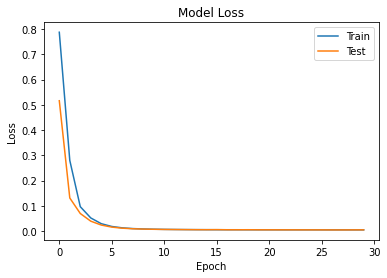

In [303]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

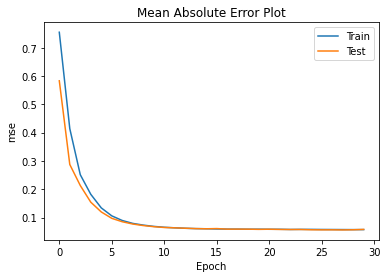

In [332]:
# summarize history for mae 
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Mean Absolute Error Plot')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [328]:
#predict new values
new_inp = [[ 253, 0.86, 0.2,  0.08, 0.3, 1.4, -1.4]]
new_inp = scalex.transform(new_inp)
value = scaley.inverse_transform(model.predict(new_inp))
print("output value is ")
print(value)

 scaled output value is 
[[246.77657]]
